### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, roc_auc_score, recall_score, precision_recall_curve, accuracy_score

### Importing dataset

In [2]:
dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Exploratory Data Analysis

In [3]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


The dataset is a mix of both Categorical and Numerical Variables. There are 35 feature columns. Attrition is our target class or label.

In [4]:
print(dataset.shape)

(1470, 35)


In [5]:
numerical = dataset.select_dtypes(include = 'int64')
print('There are {} numerical features'.format(len(numerical.columns)))
print('The Numerical features are : ')
for column in numerical.columns:
    print(column)
print('\n')
categorical = dataset.select_dtypes(include = 'object')
print('There are {} categorical features'.format(len(categorical.columns)))
print('The Categorical features are : ')
for column in categorical.columns:
    print(column)

There are 26 numerical features
The Numerical features are : 
Age
DailyRate
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


There are 9 categorical features
The Categorical features are : 
Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We are dealing with two datatypes: int64 and object.

There are no missing values in this dataset.

Use dataset.isnull().any() to search for missing values in the dataset.

In [7]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [8]:
dataset.describe(include = ["object", "bool"])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


There is only one unique value in the feature Over18. That feature can be removed as it provides no useful information.

In [9]:
dataset.drop('Over18', axis = 1, inplace = True)

In [10]:
dataset["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
dataset["Attrition"].value_counts(normalize = True)

No     0.84
Yes    0.16
Name: Attrition, dtype: float64

The fraction of attrition is pretty low. Based on the above result we can see that this is an Imbalanced dataset.

# Data Visualization

In [12]:
dataset["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [13]:
dataset["Gender"].value_counts(normalize = True)

Male      0.6
Female    0.4
Name: Gender, dtype: float64

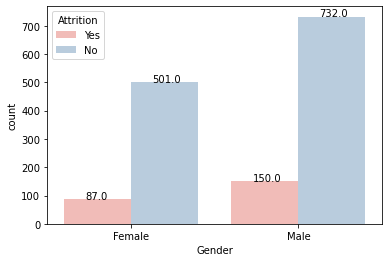

In [14]:
ax = sns.countplot(x = 'Gender', hue = 'Attrition', data = dataset, palette = 'Pastel1')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.125, p.get_height()+0.5))

plt.show()

In [15]:
dataset.groupby(by = 'Gender')["Age"].mean()

Gender
Female    37.33
Male      36.65
Name: Age, dtype: float64

In [16]:
pd.crosstab(dataset["Gender"], dataset["JobSatisfaction"], normalize = True).T

Gender,Female,Male
JobSatisfaction,,
1,0.08,0.12
2,0.08,0.11
3,0.12,0.18
4,0.12,0.20


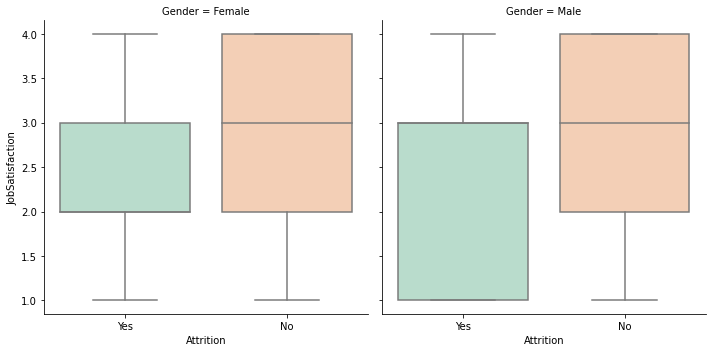

In [17]:
sns.catplot(x = 'Attrition', y = 'JobSatisfaction', col = 'Gender', data = dataset, kind = 'box', palette = 'Pastel2')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

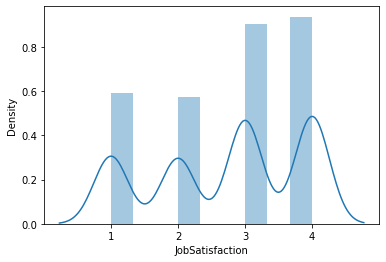

In [18]:
sns.distplot(dataset['JobSatisfaction'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

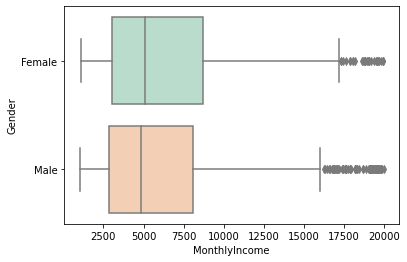

In [19]:
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = dataset, palette = 'Pastel2')

In [20]:
dataset.groupby(by = 'Gender')['MonthlyIncome'].mean()

Gender
Female    6686.57
Male      6380.51
Name: MonthlyIncome, dtype: float64

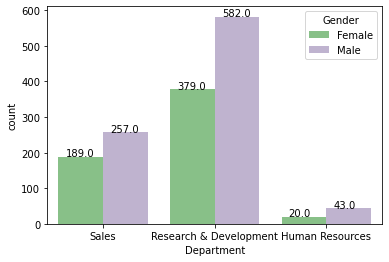

In [21]:
ax = sns.countplot(x = 'Department', hue = 'Gender', data = dataset, palette = 'Accent')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.0625, p.get_height()+0.5))

plt.show()

Gender is a balanced class among Male and Female. Both the classes have similar distributions. Even the Attrition rates are similar amoung the two classes with 14.8% for Females and 17% for Males. The average age of females is 37.33 and for males is 36.65 and both distributions are similar.

**Job Satisfaction by Gender**: For individuals who didn't leave the organization, job satisfaction levels are practically the same. However, for people who left the organization , females had a lower satisfaction level as opposed to males.

**Salaries**: The average salaries for both genders are practically the same with males having an average of 6380.51 and females 6686.57

**Departments**: There are a higher number of males in the three departments however, females are more predominant in the Research and Development department.

In [22]:
dataset.groupby(by = ['Department', 'Attrition'])['MonthlyIncome'].mean()

Department              Attrition
Human Resources         No           7345.98
                        Yes          3715.75
Research & Development  No           6630.33
                        Yes          4108.08
Sales                   No           7232.24
                        Yes          5908.46
Name: MonthlyIncome, dtype: float64

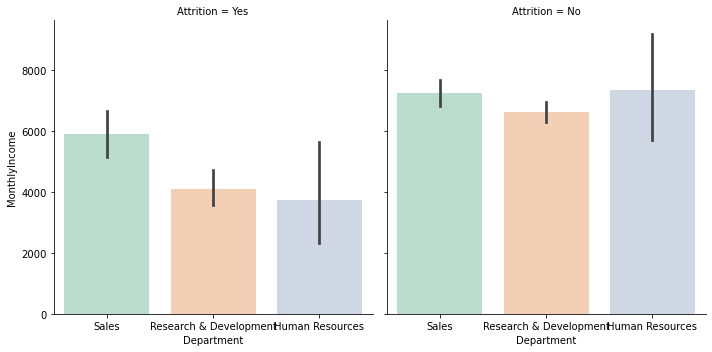

In [23]:
sns.catplot(x = 'Department', y = 'MonthlyIncome', col = 'Attrition', data = dataset, kind = 'bar', palette = 'Pastel2')

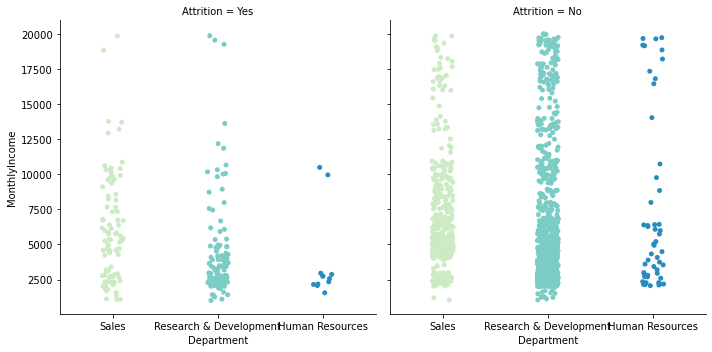

In [24]:
sns.catplot(x = 'Department', y = 'MonthlyIncome', col = 'Attrition', data = dataset, kind = 'strip', palette = 'GnBu')

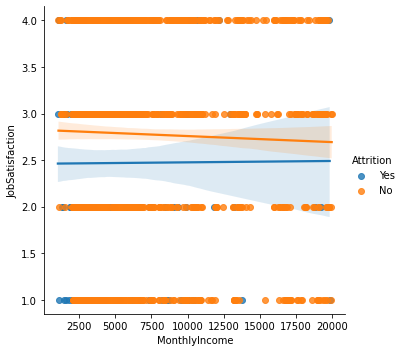

In [25]:
sns.lmplot('MonthlyIncome', 'JobSatisfaction', hue = 'Attrition', data = dataset)

In [26]:
dataset.groupby(by = ['JobSatisfaction', 'Attrition'])['MonthlyIncome'].mean()

JobSatisfaction  Attrition
1                No           7096.90
                 Yes          4752.80
2                No           6834.89
                 Yes          4962.76
3                No           6853.31
                 Yes          4595.99
4                No           6668.11
                 Yes          4943.50
Name: MonthlyIncome, dtype: float64

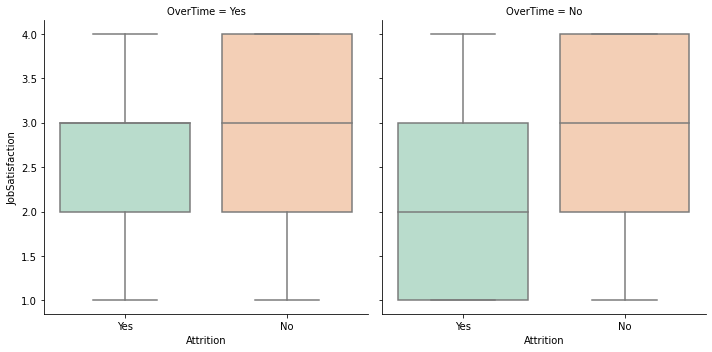

In [27]:
sns.catplot(x = 'Attrition', y = 'JobSatisfaction', col = 'OverTime', data = dataset, kind = 'box', palette = 'Pastel2')

In [28]:
pd.crosstab(dataset['Attrition'], dataset['OverTime'])

OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


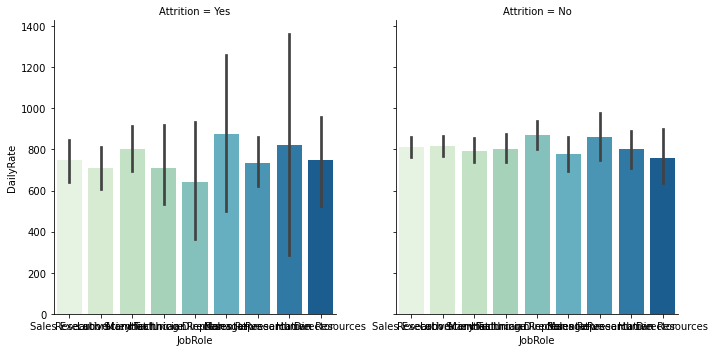

In [29]:
sns.catplot(x = 'JobRole', y = 'DailyRate', col = 'Attrition', data = dataset, kind = 'bar', palette = 'GnBu')

**Income by Departments**: We can see huge differences in each department by attrition status.

**Income by Job Satisfaction**: Lower the job satisfaction the wider the gap by attrition status in the levels of income.

**Attrition sample population**: I would say that most of this sample population has had a salary increase of less than 15% and a monthly income of less than 7,000

**Exhaustion at Work**: Over 54% of workers who left the organization worked overtime! Will this be a reason why employees are leaving?

**Differences in the DailyRate**: HealthCare Representatives , Sales Representatives , and Research Scientists have the biggest daily rates differences in terms of employees who quit or didn't quit the organization. This might indicate that at least for the these roles, the sample population that left the organization was mainly because of income.

<AxesSubplot:>

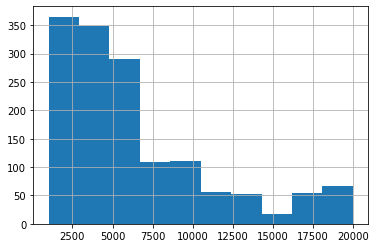

In [30]:
dataset['MonthlyIncome'].hist()

<Figure size 576x576 with 0 Axes>

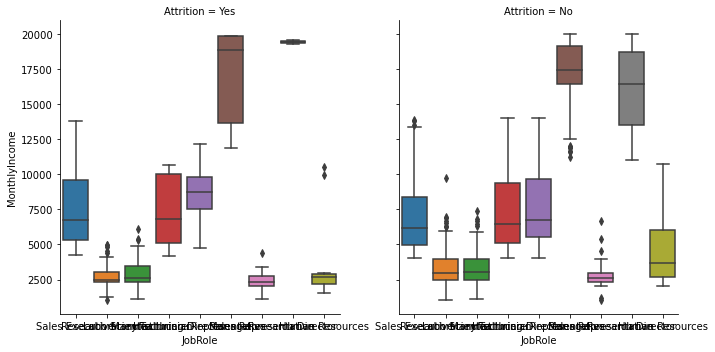

In [31]:
fig = plt.figure(figsize = (8, 8))
sns.catplot(x = 'JobRole', y = 'MonthlyIncome', col = 'Attrition', data = dataset, kind = 'box')

<AxesSubplot:xlabel='Education', ylabel='count'>

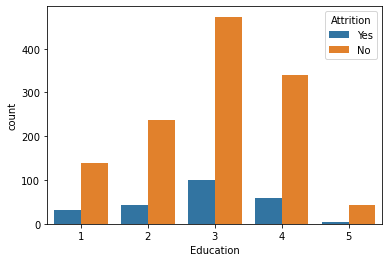

In [32]:
sns.countplot(x = 'Education', hue = 'Attrition', data = dataset)

<AxesSubplot:>

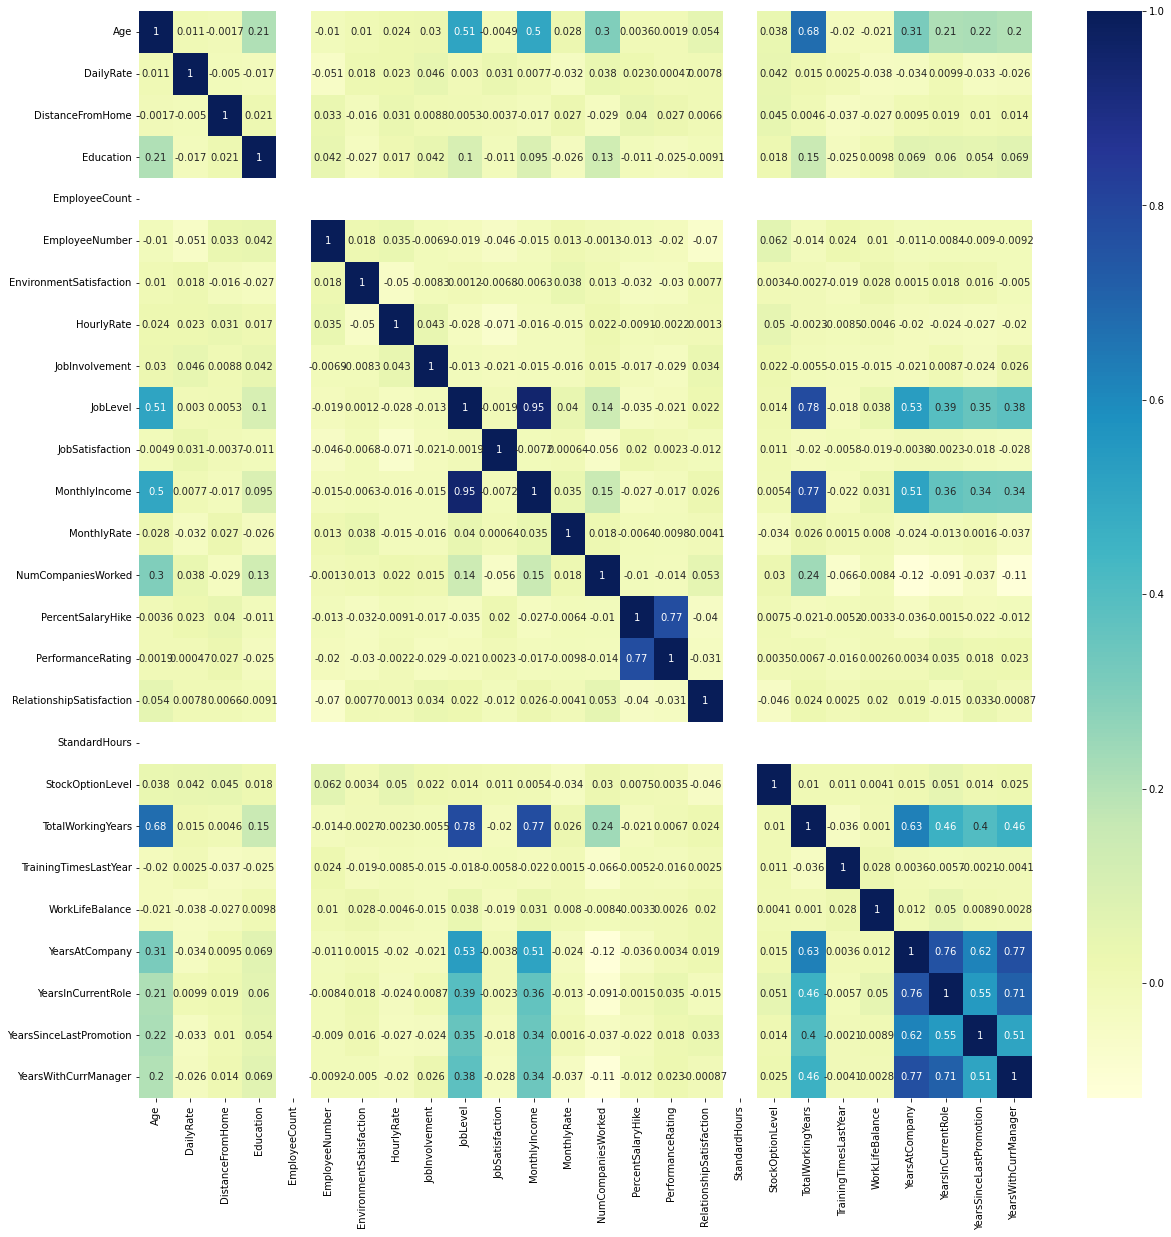

In [33]:
corr_matrix = dataset.corr(method = 'pearson')
fig = plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix, cmap = 'YlGnBu', annot = True)

It is clear from above that there is no correlation between StandardHours and EmployeeCount with other variables and hence can be removed.

In [34]:
dataset = dataset.drop(columns=['StandardHours', 'EmployeeCount'])

### Creating the dataset

In [35]:
y = dataset["Attrition"]

In [36]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [37]:
X = dataset.drop(columns = "Attrition")

In [38]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


### Feature Encoding

In [39]:
def LabelEncode(variable):
    X[variable] = labelencoder_X.fit_transform(X[variable])

In [40]:
categorical = dataset.select_dtypes(include = 'object')
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for variable in categorical.columns:
    if variable != "Attrition":
        LabelEncode(variable)
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [41]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


### Dimensionality Reduction

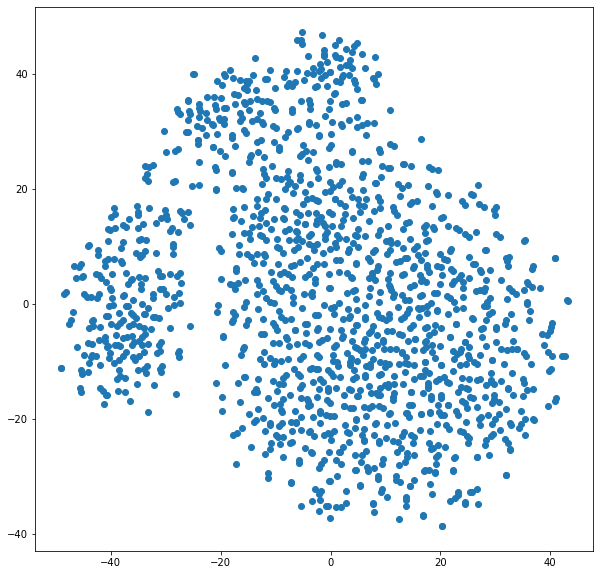

In [42]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
tsne = TSNE(random_state = 17)
tsne_repr = tsne.fit_transform(x_scaled)
fig = plt.figure(figsize = (10,10))
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1])

In [43]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


### Evaluation Curve

In [139]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [182]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [183]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

# Training the Models

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [45]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000, random_state = 0)

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

logistic = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})
logistic.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          random_state=0, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [47]:
logistic.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [48]:
logistic_pred = logistic.predict(X_test)

In [49]:
accuracy_score(y_test, logistic_pred)

0.8831521739130435

In [50]:
confusion_matrix(y_test, logistic_pred)

array([[303,   7],
       [ 36,  22]], dtype=int64)

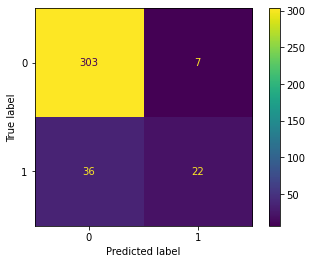

In [51]:
plot_confusion_matrix(logistic, X_test, y_test)

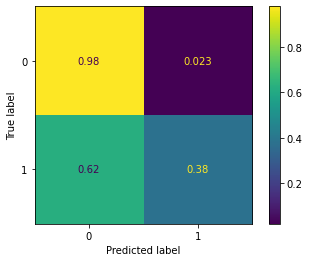

In [52]:
plot_confusion_matrix(logistic, X_test, y_test, normalize='true')

In [53]:
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       310
           1       0.76      0.38      0.51        58

    accuracy                           0.88       368
   macro avg       0.83      0.68      0.72       368
weighted avg       0.87      0.88      0.87       368



*Plot validation curves for logistic regression*

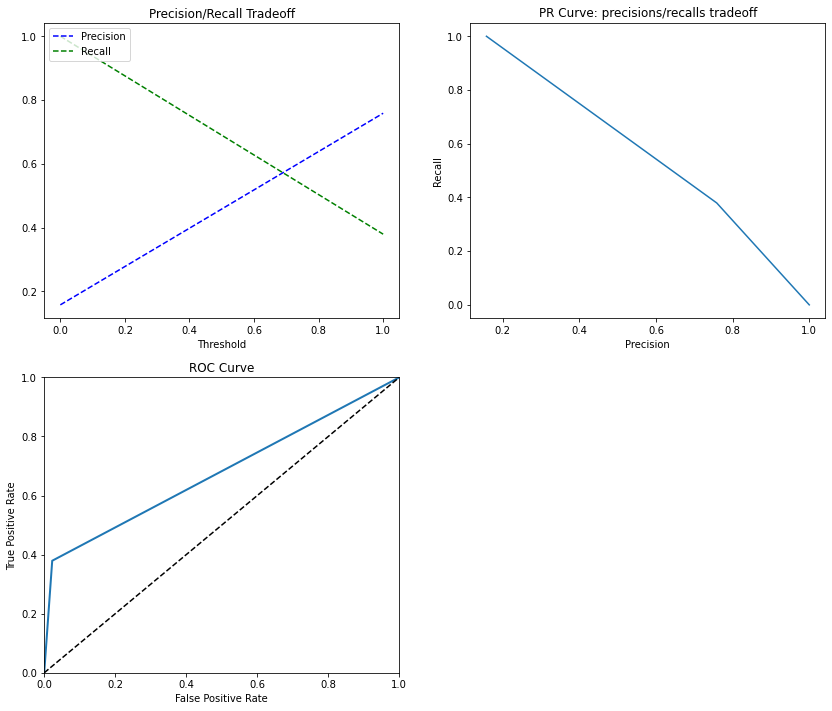

In [185]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logistic.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict(X_test))
plot_roc_curve(fpr, tpr)

In [138]:
evaluate(logistic, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[902  21]
 [116  63]]
ACCURACY SCORE:
0.8757
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.89    0.75      0.88       0.82          0.86
recall       0.98    0.35      0.88       0.66          0.88
f1-score     0.93    0.48      0.88       0.70          0.86
support    923.00  179.00      0.88    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[303   7]
 [ 36  22]]
ACCURACY SCORE:
0.8832
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.89   0.76      0.88       0.83          0.87
recall       0.98   0.38      0.88       0.68          0.88
f1-score     0.93   0.51      0.88       0.72          0.87
support    310.00  58.00      0.88     368.00        368.00


### k Nearest Neighbours

In [105]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline

knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 30)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 29 candidates, totalling 145 fits


({'knn__n_neighbors': 11}, 0.840304401480872)

In [106]:
knn_grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=11))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_jobs=-1, n_neighbors=11),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 11,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Text(0, 0.5, 'Accuracy')

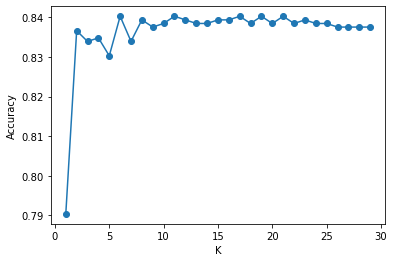

In [58]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [59]:
scaler = StandardScaler()
knn11 = KNeighborsClassifier(n_neighbors=11)
operations = [('scaler',scaler),('knn11',knn11)]

In [60]:
pipe = Pipeline(operations)

In [61]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn11', KNeighborsClassifier(n_neighbors=11))])

In [62]:
pipe_pred = pipe.predict(X_test)

In [67]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       310
           1       1.00      0.07      0.13        58

    accuracy                           0.85       368
   macro avg       0.93      0.53      0.52       368
weighted avg       0.88      0.85      0.80       368



In [64]:
accuracy_score(y_test, pipe_pred)

0.8532608695652174

In [65]:
confusion_matrix(y_test, pipe_pred)

array([[310,   0],
       [ 54,   4]], dtype=int64)

In [140]:
evaluate(knn11, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[921   2]
 [167  12]]
ACCURACY SCORE:
0.8466
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.85    0.86      0.85       0.85          0.85
recall       1.00    0.07      0.85       0.53          0.85
f1-score     0.92    0.12      0.85       0.52          0.79
support    923.00  179.00      0.85    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[310   0]
 [ 54   4]]
ACCURACY SCORE:
0.8533
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.85   1.00      0.85       0.93          0.88
recall       1.00   0.07      0.85       0.53          0.85
f1-score     0.92   0.13      0.85       0.52          0.80
support    310.00  58.00      0.85     368.00        368.00


In [68]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    kNN_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, kNN_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

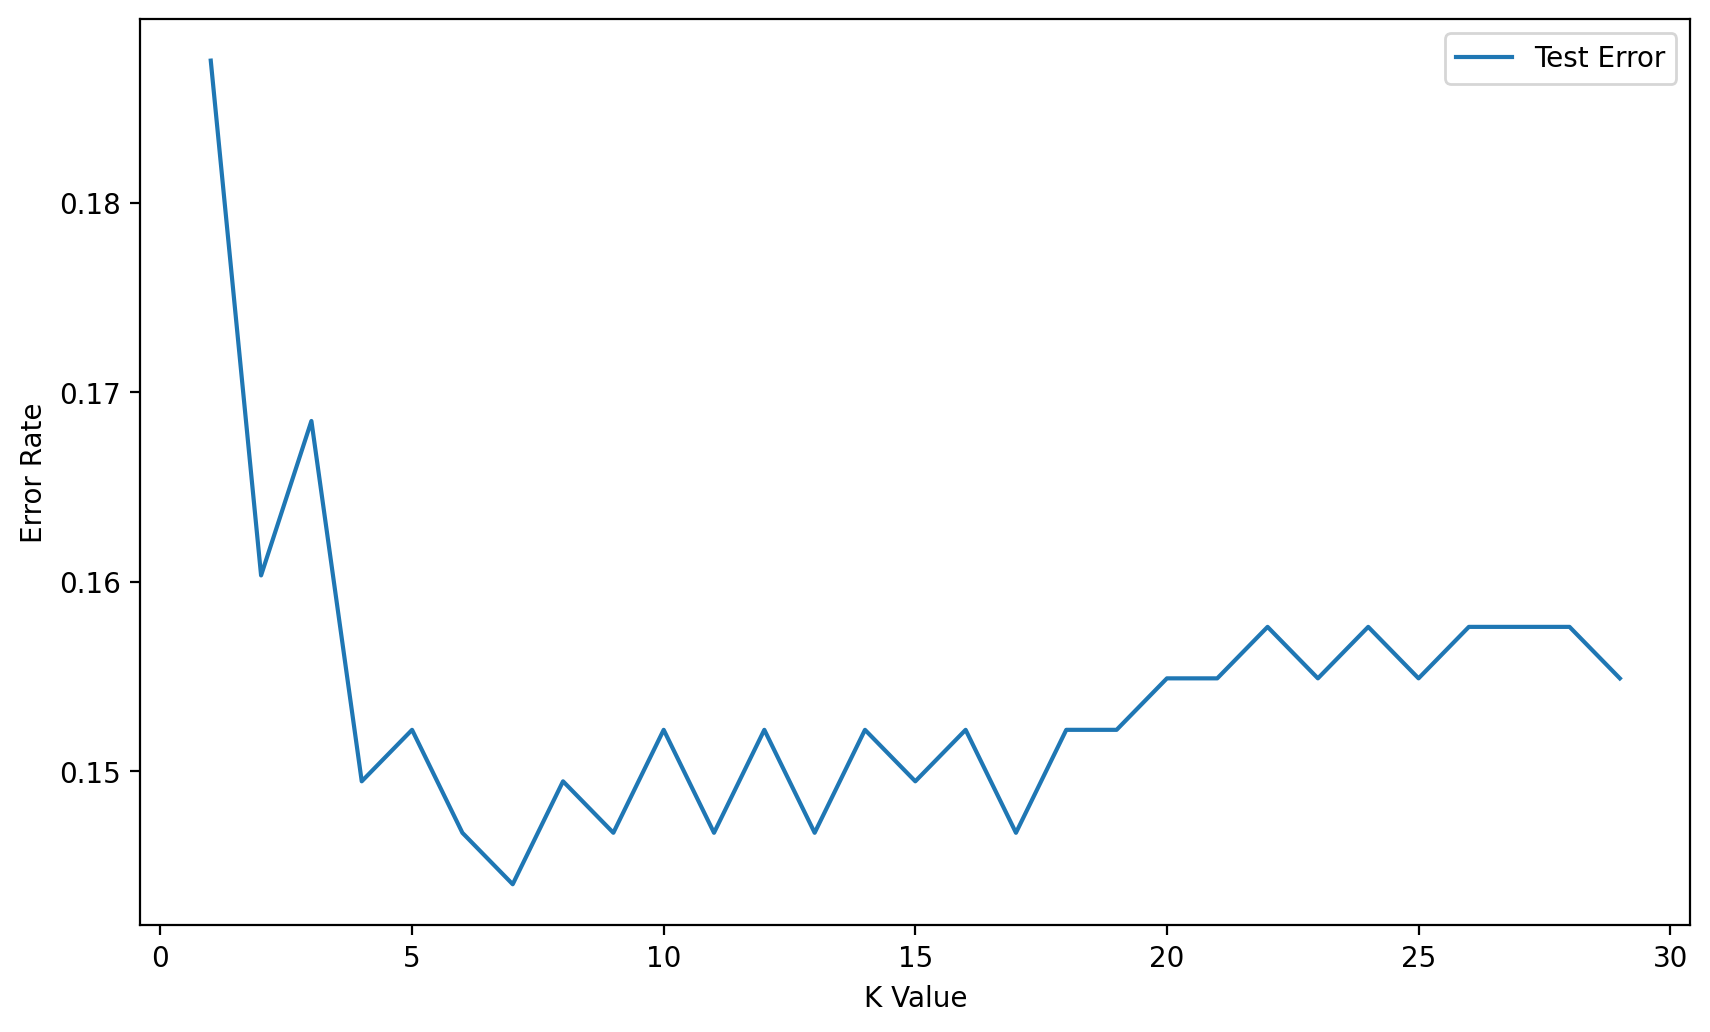

In [69]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### Support Vector Classification

In [70]:
from sklearn.svm import SVC
support_vector = SVC(kernel = 'linear', random_state = 0)
support_vector.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [71]:
support_vector_pred = support_vector.predict(X_test)

In [72]:
print("Support Vector Machines \n")
print("accuracy score is " + str(accuracy_score(y_test, support_vector_pred)))
print(classification_report(y_test, support_vector_pred))

Support Vector Machines 

accuracy score is 0.8858695652173914
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       310
           1       0.86      0.33      0.48        58

    accuracy                           0.89       368
   macro avg       0.88      0.66      0.71       368
weighted avg       0.88      0.89      0.86       368



In [73]:
from sklearn.svm import SVC
KernelSVC = SVC(kernel = 'rbf', random_state = 0)
KernelSVC.fit(X_train, y_train)

SVC(random_state=0)

In [74]:
KernelSVC_pred = KernelSVC.predict(X_test)

In [75]:
print("Kernel SVC \n")
print("accuracy score is " + str(accuracy_score(y_test, KernelSVC_pred)))
print(classification_report(y_test, KernelSVC_pred))

Kernel SVC 

accuracy score is 0.8641304347826086
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       310
           1       0.75      0.21      0.32        58

    accuracy                           0.86       368
   macro avg       0.81      0.60      0.62       368
weighted avg       0.85      0.86      0.83       368



In [142]:
evaluate(support_vector, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[909  14]
 [132  47]]
ACCURACY SCORE:
0.8675
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.87    0.77      0.87       0.82          0.86
recall       0.98    0.26      0.87       0.62          0.87
f1-score     0.93    0.39      0.87       0.66          0.84
support    923.00  179.00      0.87    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[307   3]
 [ 39  19]]
ACCURACY SCORE:
0.8859
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.89   0.86      0.89       0.88          0.88
recall       0.99   0.33      0.89       0.66          0.89
f1-score     0.94   0.48      0.89       0.71          0.86
support    310.00  58.00      0.89     368.00        368.00


In [141]:
evaluate(KernelSVC, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[921   2]
 [ 97  82]]
ACCURACY SCORE:
0.9102
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.90    0.98      0.91       0.94          0.92
recall       1.00    0.46      0.91       0.73          0.91
f1-score     0.95    0.62      0.91       0.79          0.90
support    923.00  179.00      0.91    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[306   4]
 [ 46  12]]
ACCURACY SCORE:
0.8641
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.87   0.75      0.86       0.81          0.85
recall       0.99   0.21      0.86       0.60          0.86
f1-score     0.92   0.32      0.86       0.62          0.83
support    310.00  58.00      0.86     368.00        368.00


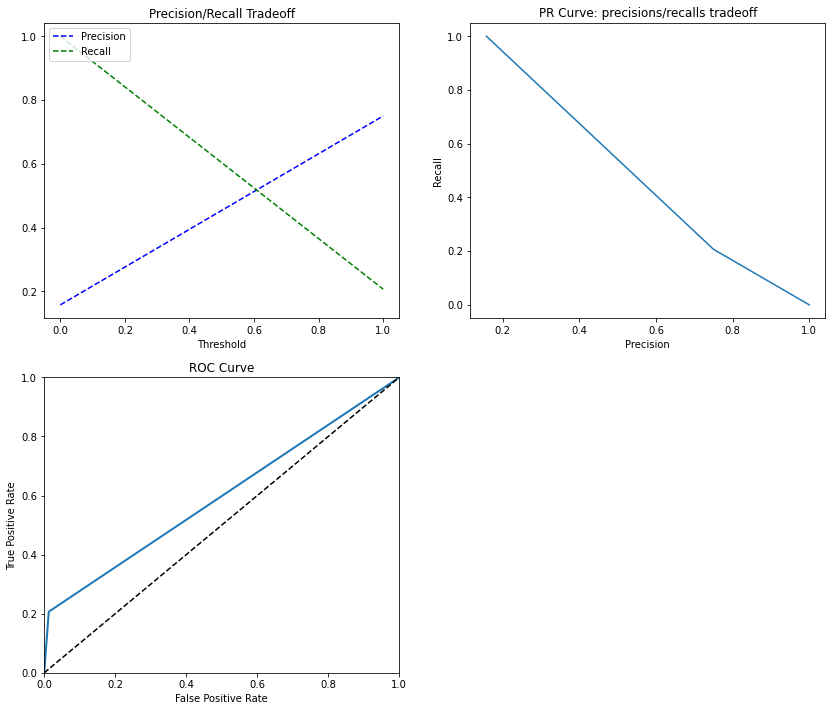

In [189]:
precisions, recalls, thresholds = precision_recall_curve(y_test, KernelSVC.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, KernelSVC.predict(X_test))
plot_roc_curve(fpr, tpr)

### Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

GaussianNB()

In [82]:
NaiveBayes_pred = NaiveBayes.predict(X_test)

In [83]:
print("Naive Bayes \n")
print("accuracy score is " + str(accuracy_score(y_test, NaiveBayes_pred)))
print(classification_report(y_test, NaiveBayes_pred))

Naive Bayes 

accuracy score is 0.8043478260869565
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       310
           1       0.42      0.64      0.51        58

    accuracy                           0.80       368
   macro avg       0.67      0.74      0.69       368
weighted avg       0.85      0.80      0.82       368



In [143]:
evaluate(NaiveBayes, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[751 172]
 [ 62 117]]
ACCURACY SCORE:
0.7877
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.92    0.40      0.79       0.66          0.84
recall       0.81    0.65      0.79       0.73          0.79
f1-score     0.87    0.50      0.79       0.68          0.81
support    923.00  179.00      0.79    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[259  51]
 [ 21  37]]
ACCURACY SCORE:
0.8043
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.93   0.42       0.8       0.67          0.85
recall       0.84   0.64       0.8       0.74          0.80
f1-score     0.88   0.51       0.8       0.69          0.82
support    310.00  58.00       0.8     368.00        368.00


### Decision Trees

In [149]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [150]:
tree_pred = tree.predict(X_test)

In [151]:
print("Decision Tree \n")
print("accuracy score is " + str(accuracy_score(y_test, tree_pred)))
print(classification_report(y_test, tree_pred))

Decision Tree 

accuracy score is 0.782608695652174
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       310
           1       0.34      0.40      0.37        58

    accuracy                           0.78       368
   macro avg       0.61      0.63      0.62       368
weighted avg       0.80      0.78      0.79       368



In [152]:
evaluate(tree, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[923   0]
 [  0 179]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    923.0  179.0       1.0     1102.0        1102.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[265  45]
 [ 35  23]]
ACCURACY SCORE:
0.7826
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.88   0.34      0.78       0.61          0.80
recall       0.85   0.40      0.78       0.63          0.78
f1-score     0.87   0.37      0.78       0.62          0.79
support    310.00  58.00      0.78     368.00        368.00


In [85]:
tree.feature_importances_

array([0.05977679, 0.01273506, 0.06513283, 0.        , 0.03899726,
       0.        , 0.01816649, 0.07652148, 0.04594575, 0.00571219,
       0.06656654, 0.03048392, 0.00453258, 0.        , 0.02061126,
       0.03986647, 0.11062912, 0.06191206, 0.04275594, 0.06637012,
       0.01926481, 0.01292827, 0.01212164, 0.0179213 , 0.03791191,
       0.01925728, 0.02139975, 0.02423219, 0.00711999, 0.02860531,
       0.03252169])

In [87]:
pd.DataFrame(index=X.columns,data=tree.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,5.98e-02
BusinessTravel,1.27e-02
DailyRate,6.51e-02
Department,0.00e+00
DistanceFromHome,3.90e-02
Education,0.00e+00
EducationField,1.82e-02
EmployeeNumber,7.65e-02
EnvironmentSatisfaction,4.59e-02
Gender,5.71e-03


In [88]:
from sklearn.tree import plot_tree

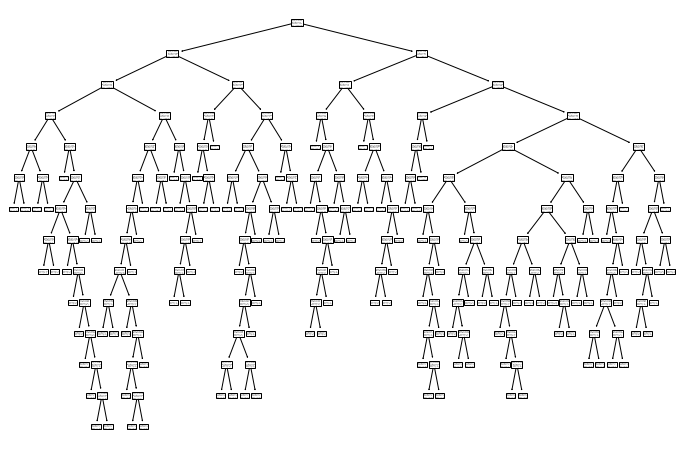

In [89]:
plt.figure(figsize=(12,8))
plot_tree(tree);

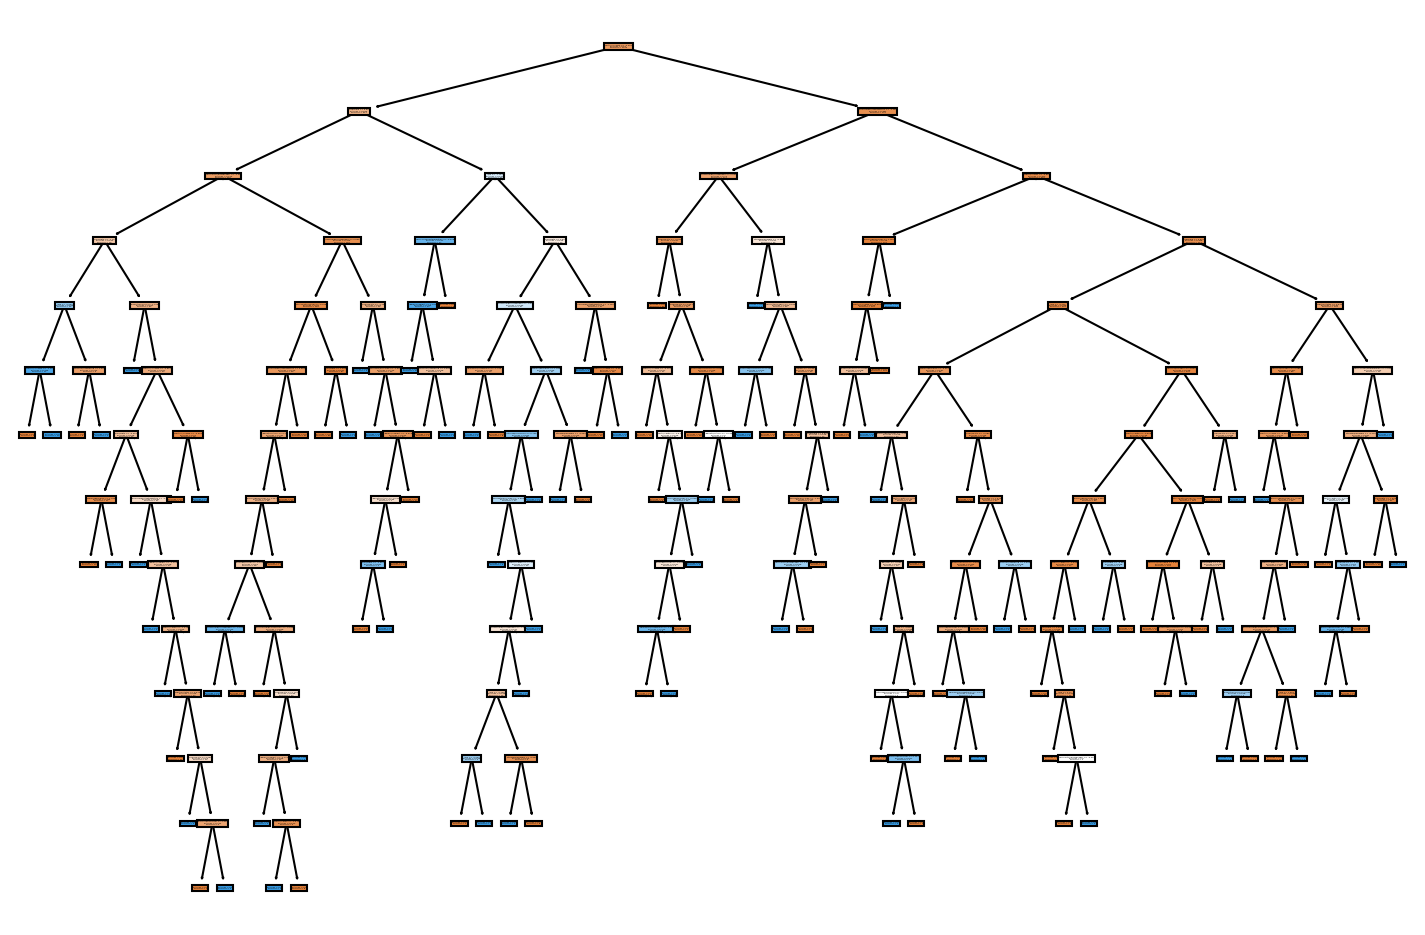

In [92]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree,filled=True,feature_names=X.columns);

In [93]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [94]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       310
           1       0.56      0.09      0.15        58

    accuracy                           0.85       368
   macro avg       0.70      0.54      0.53       368
weighted avg       0.81      0.85      0.79       368





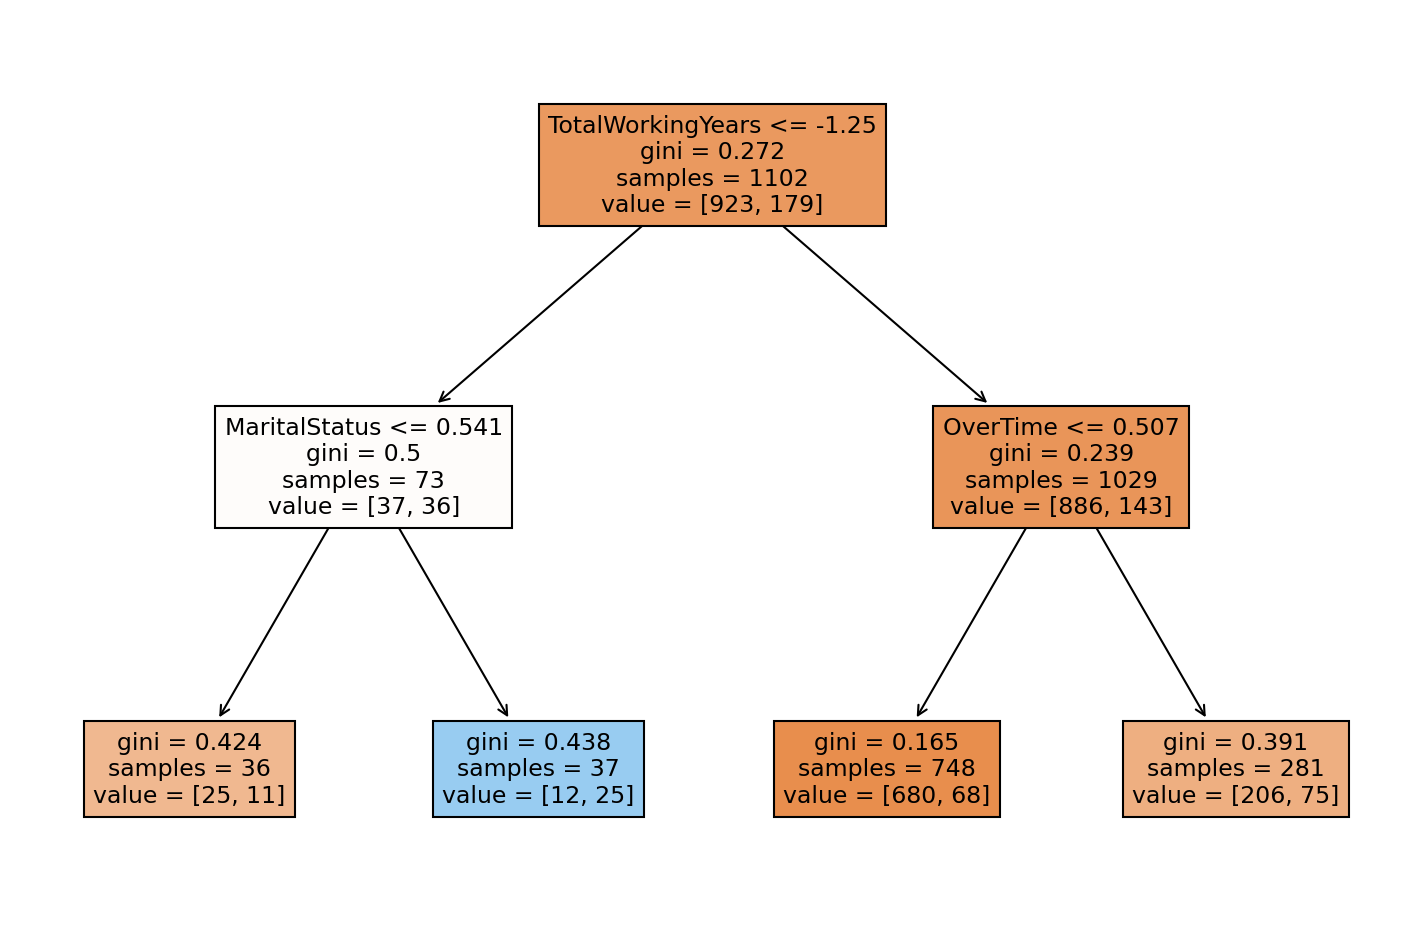

In [95]:
report_model(pruned_tree)

In [96]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.00      0.00      0.00        58

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368





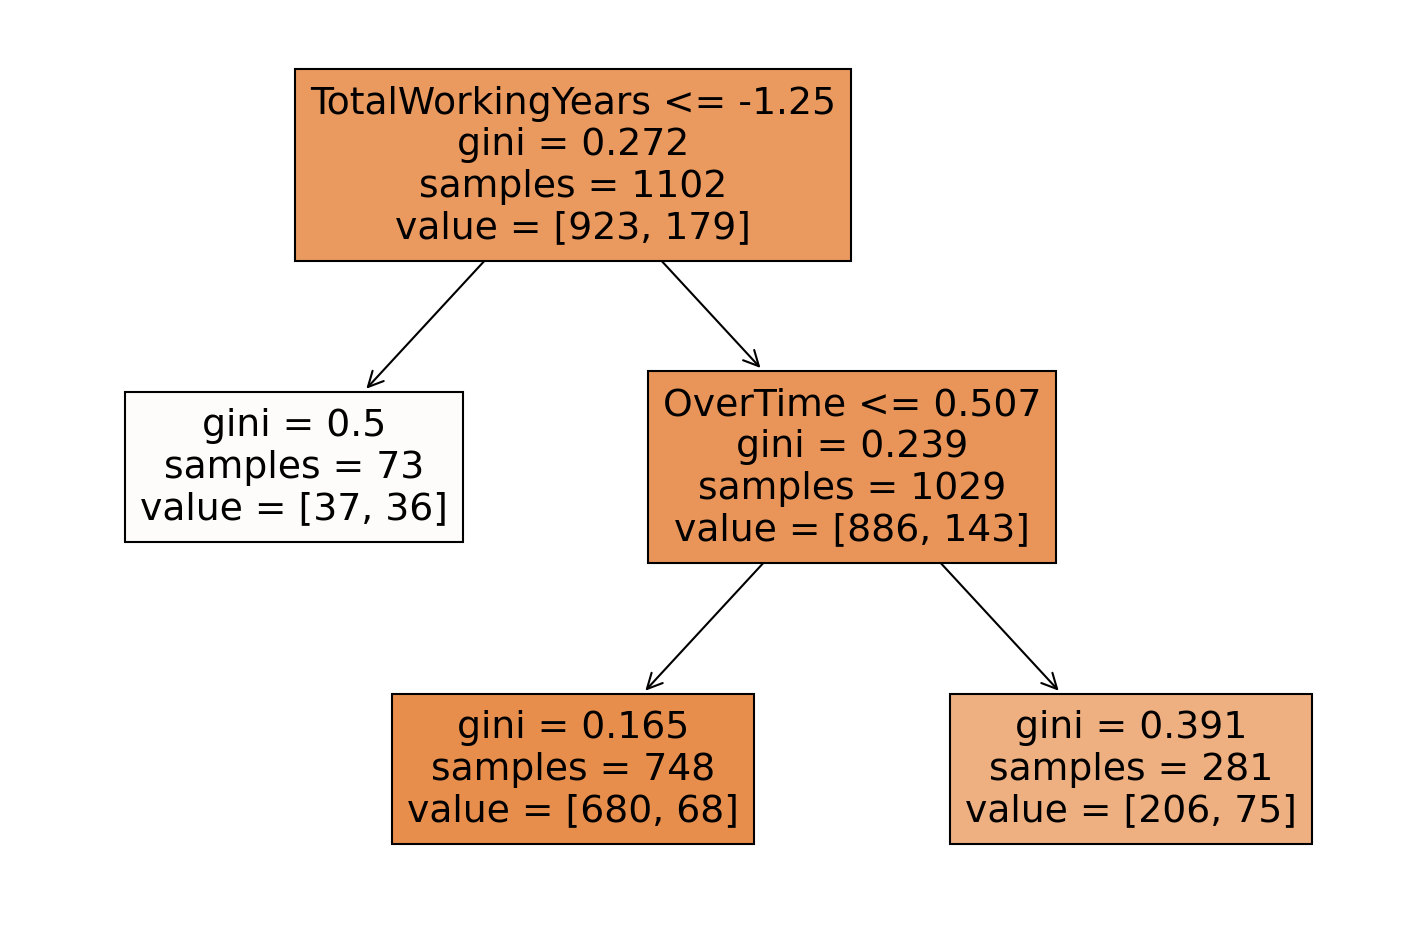

In [97]:
report_model(pruned_tree)

In [98]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       310
           1       0.33      0.33      0.33        58

    accuracy                           0.79       368
   macro avg       0.60      0.60      0.60       368
weighted avg       0.79      0.79      0.79       368





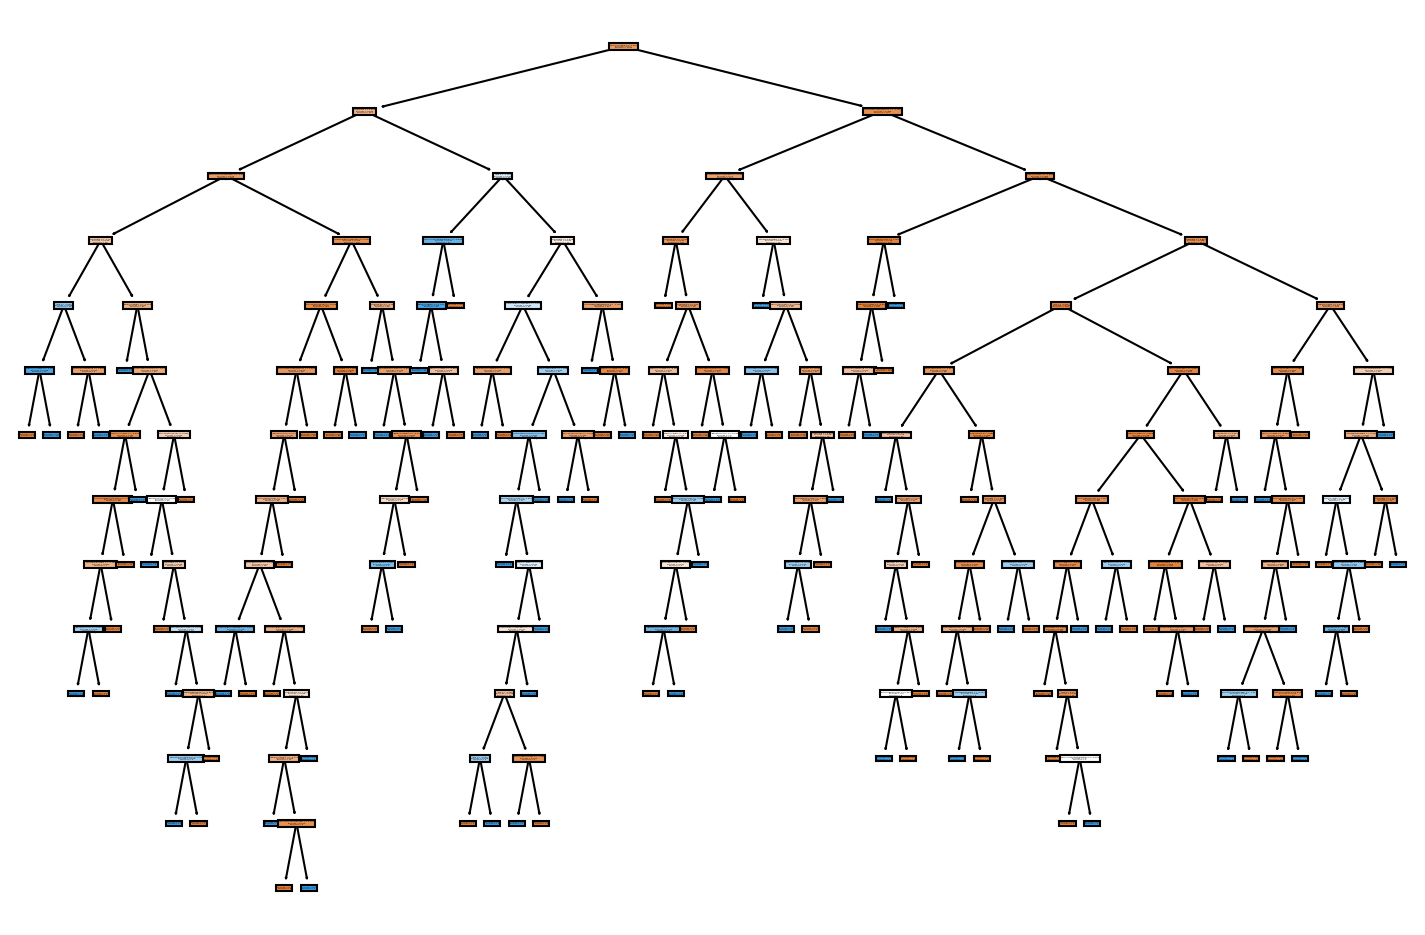

In [99]:
report_model(entropy_tree)

In [101]:
tree_params = {"max_depth": range(1, 11), "max_features": range(4, 30)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 30)},
             verbose=True)

In [102]:
tree_grid.best_params_

{'max_depth': 3, 'max_features': 13}

In [103]:
tree_grid.best_score_

0.8538996297819826

In [104]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.8396739130434783

### Random Forest Classifier

In [164]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)

In [165]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [166]:
random_forest_pred = random_forest.predict(X_test)

In [167]:
print("Random Forest \n")
print("accuracy score is " + str(accuracy_score(y_test, random_forest_pred)))
print(classification_report(y_test, random_forest_pred))

Random Forest 

accuracy score is 0.8614130434782609
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       310
           1       0.82      0.16      0.26        58

    accuracy                           0.86       368
   macro avg       0.84      0.57      0.59       368
weighted avg       0.86      0.86      0.82       368



In [168]:
evaluate(random_forest, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[923   0]
 [ 21 158]]
ACCURACY SCORE:
0.9809
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.98    1.00      0.98       0.99          0.98
recall       1.00    0.88      0.98       0.94          0.98
f1-score     0.99    0.94      0.98       0.96          0.98
support    923.00  179.00      0.98    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[308   2]
 [ 49   9]]
ACCURACY SCORE:
0.8614
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.86   0.82      0.86       0.84          0.86
recall       0.99   0.16      0.86       0.57          0.86
f1-score     0.92   0.26      0.86       0.59          0.82
support    310.00  58.00      0.86     368.00        368.00


In [110]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

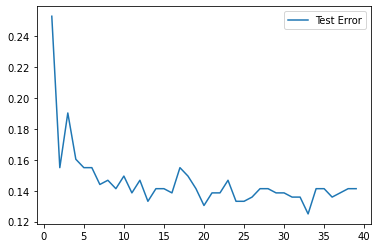

In [111]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [112]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [113]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [114]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [115]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [116]:
grid.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 100,
 'oob_score': False}

In [117]:
predictions = grid.predict(X_test)

In [118]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       310
           1       0.75      0.16      0.26        58

    accuracy                           0.86       368
   macro avg       0.81      0.57      0.59       368
weighted avg       0.84      0.86      0.82       368



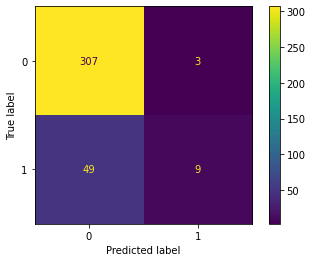

In [119]:
plot_confusion_matrix(grid,X_test,y_test)

In [120]:
grid.best_estimator_.oob_score

False

In [123]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

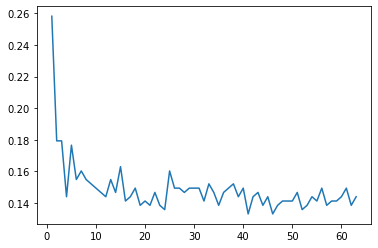

In [124]:
plt.plot(range(1,64),errors)

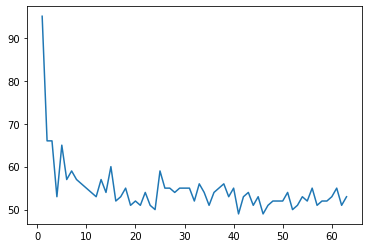

In [125]:
plt.plot(range(1,64),misclassifications)

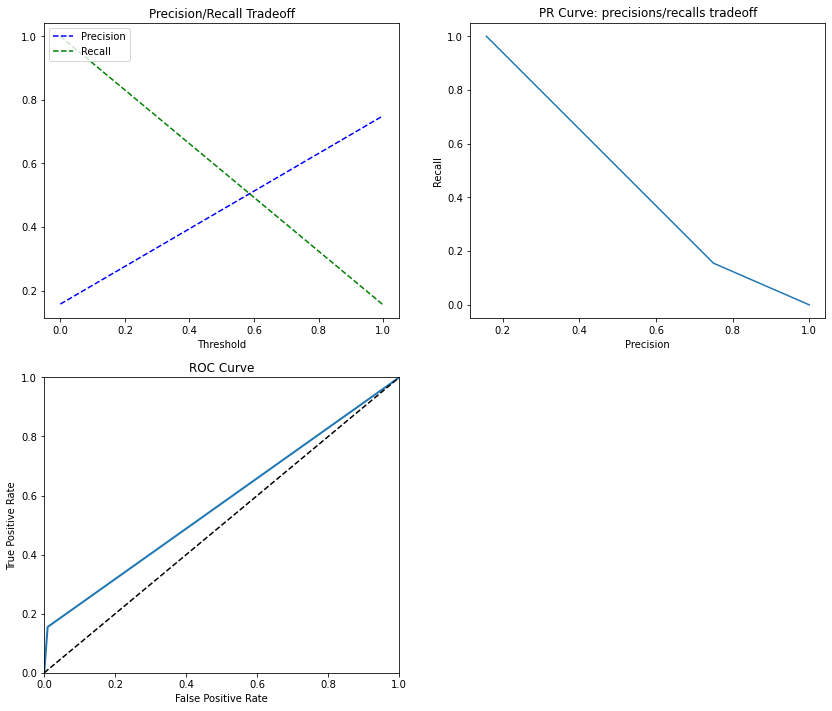

In [187]:
precisions, recalls, thresholds = precision_recall_curve(y_test, grid.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, grid.predict(X_test))
plot_roc_curve(fpr, tpr)

### XGBoost Classifier

In [190]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[923   0]
 [  0 179]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    923.0  179.0       1.0     1102.0        1102.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[304   6]
 [ 39  19]]
ACCURACY SCORE:
0.8777
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.89   0.76      0.88       0.82          0.87
recall       0.98   0.33      0.88       0.65          0.88
f1-score     0.93   0.46      0.88       0.69          0.86
support    310.00  58.00      0.88     368.00        368.00


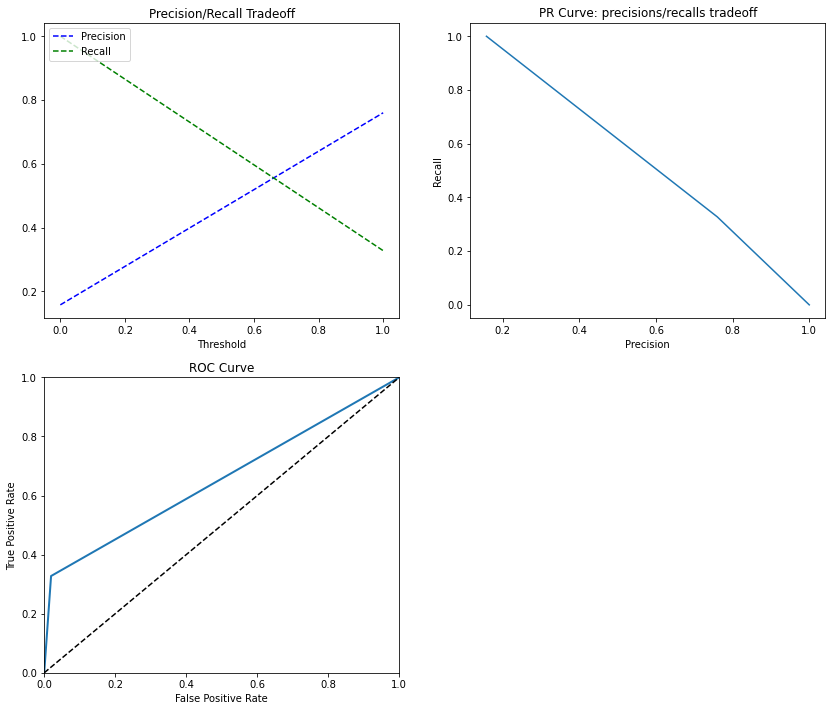

In [191]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

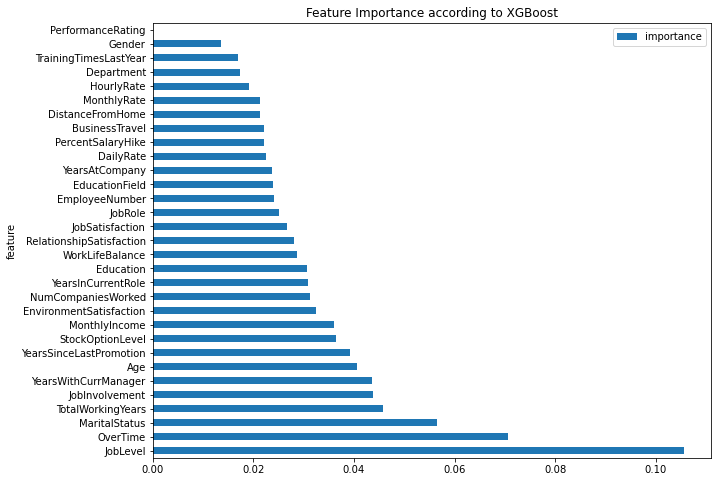

In [192]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

In [176]:
import xgboost as xgb        
xgb_classifier = xgb.XGBClassifier(n_jobs = -1)

params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state= 0)

In [177]:
# xgb 
xgb_classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                           subsample=0.6)

In [178]:
xgb_classifier.fit(X_train, y_train)

[14:26:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=7,
              missing=None, monotone_constraints='()', n_estimators=200,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [179]:
xgb_pred = xgb_classifier.predict(X_test)

XGBoostError: [14:26:43] c:\users\administrator\workspace\xgboost-win64_release_1.6.0\src\c_api\c_api_utils.h:159: Invalid missing value: null

In [180]:
xgb_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                           subsample=0.6)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
y_score = xgb_clf.predict_proba(X_test)[:,1]

model_performance_plot('xgb_clf')

[14:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBoostError: [14:27:22] c:\users\administrator\workspace\xgboost-win64_release_1.6.0\src\c_api\c_api_utils.h:159: Invalid missing value: null

### Gradient Boosting

In [169]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)

In [170]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 0,
    'verbose': 0
}

gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)

GradientBoostingClassifier(learning_rate=0.25, max_depth=4, max_features='sqrt',
                           min_samples_leaf=2, n_estimators=1500,
                           random_state=0, subsample=1)

In [171]:
gb_predictions = gb.predict(X_test)

In [172]:
print(accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

0.8695652173913043
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       310
           1       0.69      0.31      0.43        58

    accuracy                           0.87       368
   macro avg       0.79      0.64      0.68       368
weighted avg       0.85      0.87      0.85       368



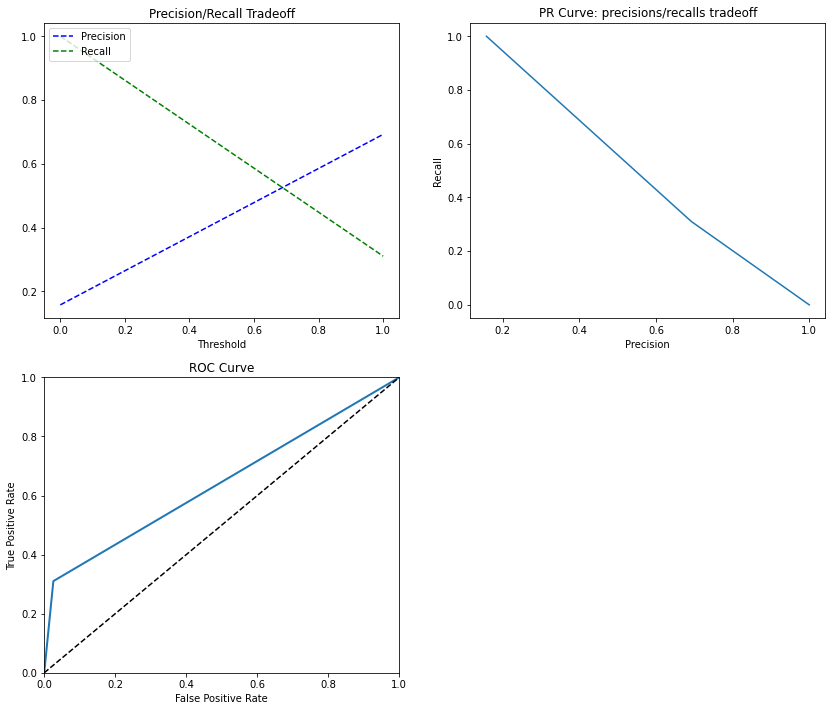

In [196]:
precisions, recalls, thresholds = precision_recall_curve(y_test, gb.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, gb.predict(X_test))
plot_roc_curve(fpr, tpr)

### LightGBM Classifier

In [173]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

evaluate(lgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[923   0]
 [  0 179]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    923.0  179.0       1.0     1102.0        1102.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[305   5]
 [ 42  16]]
ACCURACY SCORE:
0.8723
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.88   0.76      0.87       0.82          0.86
recall       0.98   0.28      0.87       0.63          0.87
f1-score     0.93   0.41      0.87       0.67          0.85
support    310.00  58.00      0.87     368.00        368.00


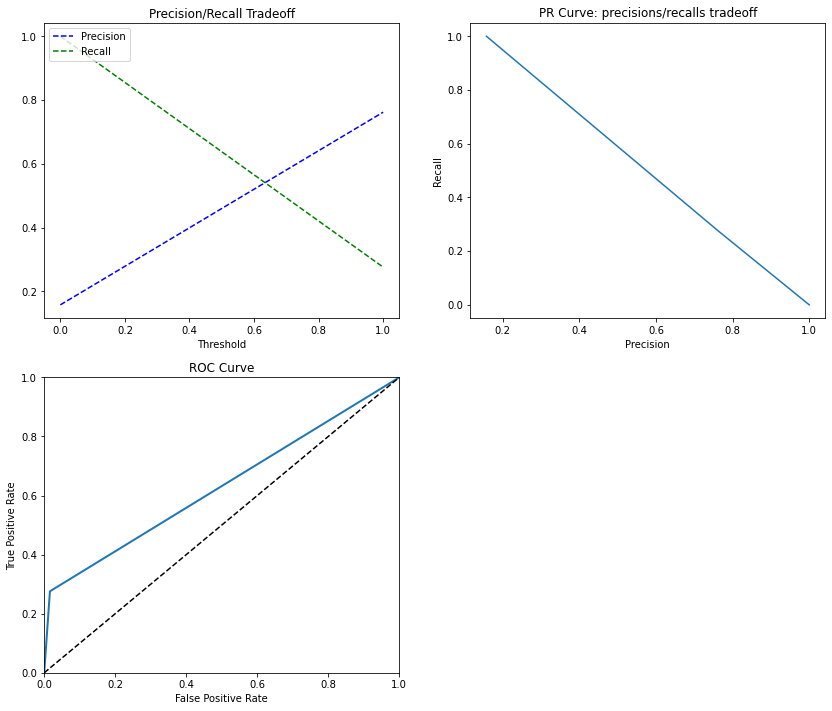

In [193]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

### CatBosst Classifier

In [175]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[923   0]
 [ 15 164]]
ACCURACY SCORE:
0.9864
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.98    1.00      0.99       0.99          0.99
recall       1.00    0.92      0.99       0.96          0.99
f1-score     0.99    0.96      0.99       0.97          0.99
support    923.00  179.00      0.99    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[308   2]
 [ 42  16]]
ACCURACY SCORE:
0.8804
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.88   0.89      0.88       0.88          0.88
recall       0.99   0.28      0.88       0.63          0.88
f1-score     0.93   0.42      0.88       0.68          0.85
support    310.00  58.00      0.88     368.00        368.00


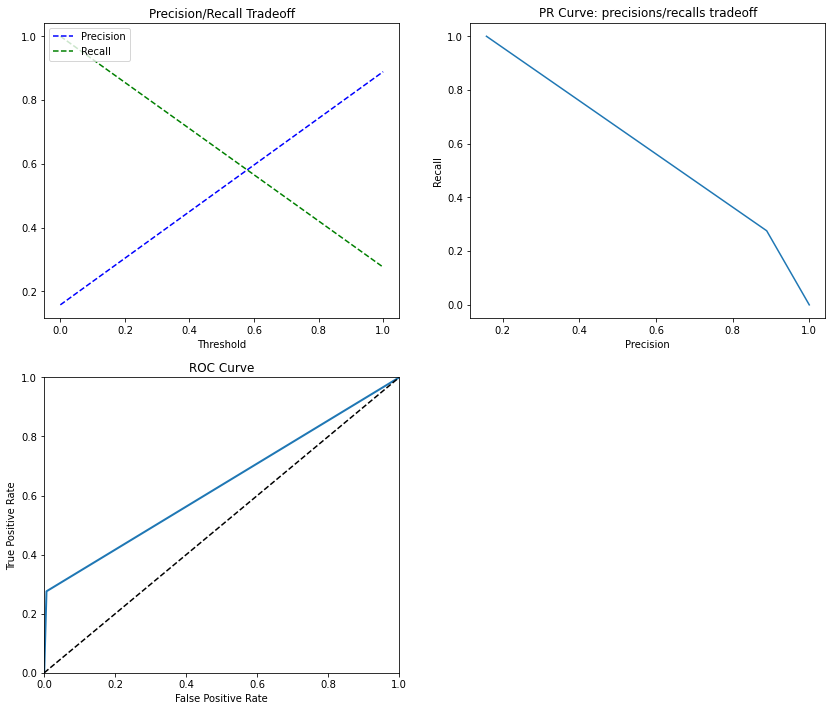

In [194]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

### AdaBoost Classifier

In [174]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[903  20]
 [ 87  92]]
ACCURACY SCORE:
0.9029
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.91    0.82       0.9       0.87          0.90
recall       0.98    0.51       0.9       0.75          0.90
f1-score     0.94    0.63       0.9       0.79          0.89
support    923.00  179.00       0.9    1102.00       1102.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[303   7]
 [ 38  20]]
ACCURACY SCORE:
0.8777
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.89   0.74      0.88       0.81          0.87
recall       0.98   0.34      0.88       0.66          0.88
f1-score     0.93   0.47      0.88       0.70          0.86
support    310.00  58.00      0.88     368.00        368.00


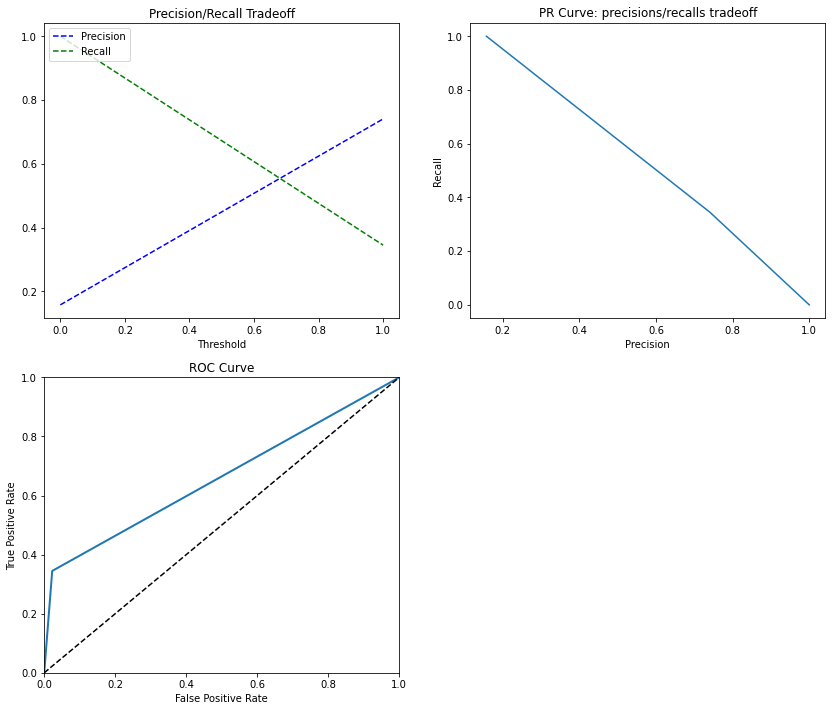

In [195]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)